In [1]:
import numpy as np
import pandas as pd
from math import log2, ceil 
import random

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.image as mpimg
import seaborn as sns

from proglearn.progressive_learner import ClassificationProgressiveLearner
from proglearn.transformers import TreeClassificationTransformer
from proglearn.voters import TreeClassificationVoter
from proglearn.deciders import SimpleArgmaxAverage

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [109]:
def sort_data(data_x, data_y, num_points_per_task, total_task=10, shift=1):
    """
    Sorts data into training and testing data sets for each task.
    """
    
    # get data and indices
    x = data_x.copy()
    y = data_y.copy()
    idx = [np.where(data_y == u)[0] for u in np.unique(data_y)]
    
    # initialize lists
    train_x_across_task = []
    train_y_across_task = []
    test_x_across_task = []
    test_y_across_task = []
    
    # calculate amount of samples per task
    batch_per_task=5000//num_points_per_task
    sample_per_class = num_points_per_task//total_task
    test_data_slot=100//batch_per_task
    
    # sort data into batches per class
    for task in range(total_task):
        for batch in range(batch_per_task):
            for class_no in range(task*10,(task+1)*10,1):
                indx = np.roll(idx[class_no],(shift-1)*100)
                # if first batch, reset arrays with new data ; otherwise, concatenate arrays
                if batch==0 and class_no==task*10:
                    train_x = x[indx[batch*sample_per_class:(batch+1)*sample_per_class],:]
                    train_y = y[indx[batch*sample_per_class:(batch+1)*sample_per_class]]
                    test_x = x[indx[batch*test_data_slot+500:(batch+1)*test_data_slot+500],:]
                    test_y = y[indx[batch*test_data_slot+500:(batch+1)*test_data_slot+500]]
                else:
                    train_x = np.concatenate((train_x, x[indx[batch*sample_per_class:(batch+1)*sample_per_class],:]), axis=0)
                    train_y = np.concatenate((train_y, y[indx[batch*sample_per_class:(batch+1)*sample_per_class]]), axis=0)
                    test_x = np.concatenate((test_x, x[indx[batch*test_data_slot+500:(batch+1)*test_data_slot+500],:]), axis=0)
                    test_y = np.concatenate((test_y, y[indx[batch*test_data_slot+500:(batch+1)*test_data_slot+500]]), axis=0)
        
        # append data to lists
        train_x_across_task.append(train_x)
        train_y_across_task.append(train_y)
        test_x_across_task.append(test_x)
        test_y_across_task.append(test_y)

    return train_x_across_task, train_y_across_task, test_x_across_task, test_y_across_task

In [115]:
# import data 
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()


############################
### Main hyperparameters ###
############################
ntrees = 50
n_tasks = 10
reps = 1 #30
estimation_set = 0.63
num_points_per_task = 5000 
num_points_per_forest = 500 
task_10_sample = 10*np.array([10, 50, 100, 200, 350, 500])


# reformat data
data_x = np.concatenate([X_train, X_test])
data_x = data_x.reshape((data_x.shape[0], data_x.shape[1] * data_x.shape[2] * data_x.shape[3]))
data_y = np.concatenate([y_train, y_test])
data_y = data_y[:, 0]

# sort data
train_x_across_task, train_y_across_task, test_x_across_task, test_y_across_task = sort_data(data_x,data_y,num_points_per_task)

In [116]:
# run the experiment
mean_acc_dict, std_acc_dict = experiment(
    train_x_across_task, 
    train_y_across_task, 
    test_x_across_task, 
    test_y_across_task,
    ntrees,
    n_tasks,
    reps, 
    estimation_set, 
    num_points_per_task,
    num_points_per_forest, 
    task_10_sample
)

doing 100 samples for 0 th rep
(37, 3072)
450
(37, 10)
0.7130000000000001
0.775
0.719
0.742
doing 500 samples for 0 th rep


/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(185, 3072)
450
(185, 10)
0.556
0.5840000000000001
0.5860000000000001
0.5680000000000001
doing 1000 samples for 0 th rep


/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(370, 3072)
450
(370, 10)
0.527
0.538
0.554
0.5409999999999999
doing 2000 samples for 0 th rep


/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(740, 3072)
450
(740, 10)
0.493
0.514
0.536
0.525
doing 3500 samples for 0 th rep


/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(1295, 3072)
450
(1295, 10)
0.475
0.49
0.508
0.498
doing 5000 samples for 0 th rep


/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(1850, 3072)
450
(1850, 10)
0.45699999999999996
0.44099999999999995
0.51
0.44299999999999995


/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/echang39/.local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal


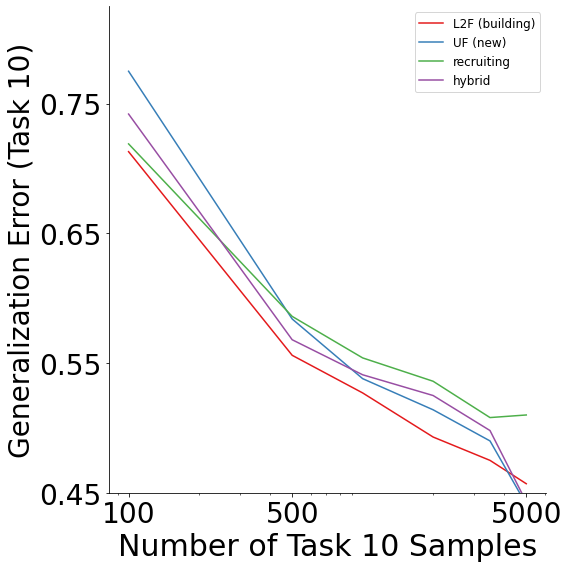

In [118]:
def recruitment_plot(mean_acc_dict, std_acc_dict, ns):
    """
    Plot the results from the recruitment experiment.
    """
    
    # determine colors and labels for figure
    colors = sns.color_palette('Set1', n_colors=len(mean_acc_dict))
    labels = ['L2F (building)', 'UF (new)', 'recruiting', 'hybrid']
    
    # plot and format figure
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    for i, key in enumerate(mean_acc_dict):
        ax.plot(ns, mean_acc_dict[key], c=colors[i], label=labels[i])
        upper_bound = np.array(mean_acc_dict[key]) + 1.96*np.array(std_acc_dict[key])
        lower_bound = np.array(mean_acc_dict[key]) - 1.96*np.array(std_acc_dict[key])
        ax.fill_between(ns, 
                        upper_bound, 
                        lower_bound, 
                        where=upper_bound >= lower_bound,
                        facecolor=colors[i], 
                        alpha=0.15,
                        interpolate=False)
    #ax.set_title("CIFAR Recruitment Experiment",fontsize=30)
    ax.set_ylabel('Generalization Error (Task 10)', fontsize=28)
    ax.set_xlabel('Number of Task 10 Samples', fontsize=30)
    ax.tick_params(labelsize=28)
    ax.set_xscale('log')
    ax.set_xticks([100, 500, 5000])
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.set_ylim(0.450, 0.825)
    ax.set_yticks([0.45, 0.55, 0.65, 0.75])
    ax.legend(fontsize=12)
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    plt.tight_layout()

# plot results
recruitment_plot(mean_acc_dict, std_acc_dict, task_10_sample)

In [3]:
# train_x_across_task[0].shape     # (5000, 3072)
# len(train_x_across_task)         # 10
# test_x_across_task[0].shape      # (1000, 3072)
# len(test_x_across_task)          # 10

# dataset preprocessing

In [4]:
df = pd.read_csv("LLF_tidy_images/out_all_CARS.csv")
df

,dataset,filePath,baseName,label0,label1,subset
0,Cars,../datasets_resized_wLabels/Cars/cars_train/00...,00001.jpg,Audi,Audi TTS Coupe 2012,train
1,Cars,../datasets_resized_wLabels/Cars/cars_train/00...,00002.jpg,Acura,Acura TL Sedan 2012,train
2,Cars,../datasets_resized_wLabels/Cars/cars_train/00...,00003.jpg,Dodge,Dodge Dakota Club Cab 2007,train
3,Cars,../datasets_resized_wLabels/Cars/cars_train/00...,00004.jpg,Hyundai,Hyundai Sonata Hybrid Sedan 2012,train
4,Cars,../datasets_resized_wLabels/Cars/cars_train/00...,00005.jpg,Ford,Ford F-450 Super Duty Crew Cab 2012,train
...,...,...,...,...,...,...
16180,Cars,../datasets_resized_wLabels/Cars/cars_train/08...,08037.jpg,Chevrolet,Chevrolet Sonic Sedan 2012,test
16181,Cars,../datasets_resized_wLabels/Cars/cars_train/08...,08038.jpg,Audi,Audi V8 Sedan 1994,test
16182,Cars,../datasets_resized_wLabels/Cars/cars_train/08...,08039.jpg,Audi,Audi 100 Sedan 1994,test
16183,Cars,../datasets_resized_wLabels/Cars/cars_train/08...,08040.jpg,BMW,BMW Z4 Convertible 2012,test


In [5]:
# get shifted file path
df["filePath_shifted"] = df.filePath.str[3:]
# drop unnecessary columns
df = df.drop(columns=["dataset","baseName","label0"])
df

,filePath,label1,subset,filePath_shifted
0,../datasets_resized_wLabels/Cars/cars_train/00...,Audi TTS Coupe 2012,train,datasets_resized_wLabels/Cars/cars_train/00001...
1,../datasets_resized_wLabels/Cars/cars_train/00...,Acura TL Sedan 2012,train,datasets_resized_wLabels/Cars/cars_train/00002...
2,../datasets_resized_wLabels/Cars/cars_train/00...,Dodge Dakota Club Cab 2007,train,datasets_resized_wLabels/Cars/cars_train/00003...
3,../datasets_resized_wLabels/Cars/cars_train/00...,Hyundai Sonata Hybrid Sedan 2012,train,datasets_resized_wLabels/Cars/cars_train/00004...
4,../datasets_resized_wLabels/Cars/cars_train/00...,Ford F-450 Super Duty Crew Cab 2012,train,datasets_resized_wLabels/Cars/cars_train/00005...
...,...,...,...,...
16180,../datasets_resized_wLabels/Cars/cars_train/08...,Chevrolet Sonic Sedan 2012,test,datasets_resized_wLabels/Cars/cars_train/08037...
16181,../datasets_resized_wLabels/Cars/cars_train/08...,Audi V8 Sedan 1994,test,datasets_resized_wLabels/Cars/cars_train/08038...
16182,../datasets_resized_wLabels/Cars/cars_train/08...,Audi 100 Sedan 1994,test,datasets_resized_wLabels/Cars/cars_train/08039...
16183,../datasets_resized_wLabels/Cars/cars_train/08...,BMW Z4 Convertible 2012,test,datasets_resized_wLabels/Cars/cars_train/08040...


In [6]:
# split into train and test set
train_df = df[df["subset"]=="train"]
test_df = df[df["subset"]=="test"]

In [63]:
## filter for labels with enough train/test images ##############
train_filt_thresh = 40
test_filt_thresh = 40
#################################################################

# get unique labels
unique_labels = pd.unique(df["label1"])
print("len unique labels", len(unique_labels))
      
# # number of train and test images per unique label 
# print("train min:", min(train_df['label1'].value_counts()[train_df['label1'].unique()].values), 
#       " / train argmin:", np.argmin(train_df['label1'].value_counts()[train_df['label1'].unique()].values))
# print("test min:", min(test_df['label1'].value_counts()[train_df['label1'].unique()].values), 
#       "/ test argmin:", np.argmin(test_df['label1'].value_counts()[train_df['label1'].unique()].values))

# get labels associated with enough train/test_images
filtered_labels = unique_labels[(train_df['label1'].value_counts()[train_df['label1'].unique()].values >= train_filt_thresh).astype(int) 
                          + ((test_df['label1'].value_counts()[train_df['label1'].unique()].values >= test_filt_thresh).astype(int)) == 2]
print("len filtered labels", len(filtered_labels))

# filter train and test dataframes and replace with numerical labels
filtered_train_df = pd.DataFrame()
filtered_test_df = pd.DataFrame()
for idx, lbl in enumerate(filtered_labels):
    filtered_train_df = filtered_train_df.append(train_df[train_df["label1"]==lbl].head(40))
    filtered_train_df = filtered_train_df.replace({'label1': {lbl: idx}})
    filtered_test_df = filtered_test_df.append(test_df[test_df["label1"]==lbl].head(40))
    filtered_test_df = filtered_test_df.replace({'label1': {lbl: idx}})

## 140 instead of 141 categories ################################

n_tasks = int(np.floor(len(filtered_labels)/10))

# add something with floor(len filtered labels) * filt_thresh 
# aka 140 * 40 

filtered_train_df = filtered_train_df.head(5600)
filtered_test_df = filtered_test_df.head(5600)
#################################################################

# get training data
train_X = []
train_y = []
for idx in range(len(filtered_train_df)):
    # get filepath and read in image
    fp = filtered_train_df["filePath_shifted"].iloc[idx]
    im = np.array(mpimg.imread(fp), dtype="uint8").flatten()
    # append image and label to list
    train_X.append(im)
    train_y.append(filtered_train_df["label1"].iloc[idx])
# get testing data
test_X = []
test_y = []
for idx in range(len(filtered_test_df)):
    # get filepath and read in image
    fp = filtered_test_df["filePath_shifted"].iloc[idx]
    im = np.array(mpimg.imread(fp), dtype="uint8").flatten()
    # append image and label to list
    test_X.append(im)
    test_y.append(filtered_test_df["label1"].iloc[idx])
print("LENGTHS // train x:",len(train_X),", train y:",len(train_y),", test x:",len(test_X),", test y:",len(test_y))


# calculate number of training and testing samples per task
train_samples_per_task = int(len(train_y)/n_tasks)
test_samples_per_task = int(len(test_y)/n_tasks)
# divide up train and test data based on this value
train_X = [np.array(train_X[i:i+train_samples_per_task]).reshape(10*train_filt_thresh,3072) for i in range(0,len(train_X),train_samples_per_task)]
train_y = [np.array(train_y[i:i+train_samples_per_task]) for i in range(0,len(train_y),train_samples_per_task)]
test_X = [np.array(test_X[i:i+test_samples_per_task]).reshape(10*test_filt_thresh,3072) for i in range(0,len(test_X),test_samples_per_task)]
test_y = [np.array(test_y[i:i+test_samples_per_task]) for i in range(0,len(test_y),test_samples_per_task)]
print("TASK SPLIT LENGTHS // train x:",len(train_X),", train y:",len(train_y),", test x:",len(test_X),", test y:",len(test_y))

print(train_X[0].shape)

len unique labels 196
len filtered labels 141
LENGTHS // train x: 5600 , train y: 5600 , test x: 5600 , test y: 5600
TASK SPLIT LENGTHS // train x: 14 , train y: 14 , test x: 14 , test y: 14
(400, 3072)


# run experiment

In [89]:
class PosteriorsByTreeLearner(ClassificationProgressiveLearner):
    """
    Variation on the progressive learner class ClassificationProgressiveLearner 
    to allow for return of posterior probabilities by tree.
    """
    
    def predict_proba(self, X, task_id, transformer_ids=None):
        """
        Calls predict_proba_tree for the decider class. Works in conjunction with
        class PosteriorsByTree.
        """
        decider = self.task_id_to_decider[task_id]
        return self.task_id_to_decider[task_id].predict_proba_tree(
            X, transformer_ids=transformer_ids
        )
    

class PosteriorsByTree(SimpleArgmaxAverage):
    """Variation on the decider class SimpleArgmaxAverage to allow for return of 
    posterior probabilities by tree.
    """
    
    def predict_proba_tree(self, X, transformer_ids=None):
        """
        Predicts posterior probabilities by tree. 
        
        Returns array of dimension (num_transformers*len(transformer_ids)) 
        containing posterior probabilities.
        """
        vote_per_alltrees = []
        for transformer_id in (
            transformer_ids
            if transformer_ids is not None
            else self.transformer_id_to_voters_.keys()
        ):
            for bag_id in range(
                len(self.transformer_id_to_transformers_[transformer_id])
            ):
                transformer = self.transformer_id_to_transformers_[transformer_id][
                    bag_id
                ]
                X_transformed = transformer.transform(X)
                voter = self.transformer_id_to_voters_[transformer_id][bag_id]
                vote = voter.predict_proba(X_transformed)
                vote_per_alltrees.append(vote)
        return vote_per_alltrees

def experiment(train_x_across_task, train_y_across_task, test_x_across_task, test_y_across_task, 
               ntrees, n_tasks, reps, estimation_set, num_points_per_task, num_points_per_forest, task_10_sample):
    """
    Run the recruitment experiment.
    """
    
    # create matrices for storing values
    hybrid = np.zeros(reps,dtype=float)
    building = np.zeros(reps,dtype=float)
    recruiting= np.zeros(reps,dtype=float)
    uf = np.zeros(reps,dtype=float)
    mean_accuracy_dict = {'building':[],'UF':[],'recruiting':[],'hybrid':[]}
    std_accuracy_dict = {'building':[],'UF':[],'recruiting':[],'hybrid':[]}

    # iterate over all sample sizes ns
    for ns in task_10_sample: 

        # size of estimation and validation sample sets
        estimation_sample_no = ceil(estimation_set*ns)
        validation_sample_no = ns - estimation_sample_no

        # repeat `rep` times
        for rep in range(reps):
            print("doing {} samples for {} th rep".format(ns,rep))

            # initiate lifelong learner
            l2f = PosteriorsByTreeLearner(
                default_transformer_class=TreeClassificationTransformer,
                default_transformer_kwargs={},
                default_voter_class=TreeClassificationVoter,
                default_voter_kwargs={
                    "finite_sample_correction": False
                },
                default_decider_class=PosteriorsByTree,
                default_decider_kwargs={},
            )

            # train l2f on first 9 tasks
            for task in range(n_tasks-1):
                indx = np.random.choice(num_points_per_task, num_points_per_forest, replace=False)
                cur_X = train_x_across_task[task][indx]
                cur_y = train_y_across_task[task][indx]

                l2f.add_task(
                    cur_X, 
                    cur_y,
                    num_transformers = ntrees,
                    #transformer_kwargs={"kwargs":{"max_depth": ceil(log2(num_points_per_forest))}},
                    voter_kwargs={"classes": np.unique(cur_y),"finite_sample_correction": False},
                    decider_kwargs={"classes": np.unique(cur_y)}
                )

            # train l2f on 10th task
            task_10_train_indx = np.random.choice(num_points_per_task, ns, replace=False)
            cur_X = train_x_across_task[n_tasks-1][task_10_train_indx[:estimation_sample_no]]
            cur_y = train_y_across_task[n_tasks-1][task_10_train_indx[:estimation_sample_no]]

            l2f.add_task(
                cur_X, 
                cur_y,
                num_transformers = ntrees,
                #transformer_kwargs={"kwargs":{"max_depth": ceil(log2(estimation_sample_no))}},
                voter_kwargs={"classes": np.unique(cur_y),"finite_sample_correction": False},
                decider_kwargs={"classes": np.unique(cur_y)}
            )

            ## L2F validation ####################################
            # get posteriors for l2f on first 9 tasks
            # want posteriors_across_trees to have shape ((n_tasks-1)*ntrees, validation_sample_no, 10)
            posteriors_across_trees = l2f.predict_proba(
                train_x_across_task[n_tasks-1][task_10_train_indx[estimation_sample_no:]],
                task_id=n_tasks-1,
                transformer_ids=list(range(n_tasks-1))
                )
            # compare error in each tree and choose best 25/50 trees
            error_across_trees = np.zeros((n_tasks-1)*ntrees)
            validation_target = train_y_across_task[n_tasks-1][task_10_train_indx[estimation_sample_no:]]
            for tree in range(len(posteriors_across_trees)):
                res = np.argmax(posteriors_across_trees[tree],axis=1) + 10*(n_tasks-1)
                error_across_trees[tree] = 1-np.mean(validation_target==res)
            best_50_tree = np.argsort(error_across_trees)[:50]
            best_25_tree = best_50_tree[:25]

            ## uf trees validation ###############################
            # get posteriors for l2f on only the 10th task
            posteriors_across_trees = l2f.predict_proba(
                train_x_across_task[n_tasks-1][task_10_train_indx[estimation_sample_no:]],
                task_id=n_tasks-1,
                transformer_ids=[n_tasks-1]
                )
            # compare error in each tree and choose best 25 trees
            error_across_trees = np.zeros(ntrees)
            validation_target = train_y_across_task[n_tasks-1][task_10_train_indx[estimation_sample_no:]]
            for tree in range(ntrees):
                res = np.argmax(posteriors_across_trees[tree],axis=1) + 10*(n_tasks-1)
                error_across_trees[tree] = 1-np.mean(validation_target==res)
            best_25_uf_tree = np.argsort(error_across_trees)[:25]

            ## evaluation ########################################
            # train 10th tree under each scenario: building, recruiting, hybrid, UF
            # BUILDING
            building_res = l2f.predict(test_x_across_task[n_tasks-1],task_id=n_tasks-1) 
            building[rep] = 1 - np.mean(test_y_across_task[n_tasks-1]==building_res)
            # UF
            uf_res = l2f.predict(test_x_across_task[n_tasks-1],task_id=n_tasks-1,transformer_ids=[n_tasks-1]) 
            uf[rep] = 1 - np.mean(test_y_across_task[n_tasks-1]==uf_res)
            # RECRUITING
            posteriors_across_trees = l2f.predict_proba(
                test_x_across_task[n_tasks-1],
                task_id=n_tasks-1,
                transformer_ids=list(range(n_tasks-1))
            )
            recruiting_posterior = np.mean(np.array(posteriors_across_trees)[best_50_tree],axis=0)
            res = np.argmax(recruiting_posterior,axis=1) + 10*(n_tasks-1)
            recruiting[rep] = 1 - np.mean(test_y_across_task[n_tasks-1]==res)
            # HYBRID
            posteriors_across_trees_hybrid_uf = l2f.predict_proba(
                test_x_across_task[n_tasks-1],
                task_id=n_tasks-1,
                transformer_ids=[n_tasks-1]
            )
            hybrid_posterior_all = np.concatenate(
                (np.array(posteriors_across_trees)[best_25_tree],np.array(posteriors_across_trees_hybrid_uf)[best_25_uf_tree]),
                axis=0
            )
            hybrid_posterior = np.mean(hybrid_posterior_all,axis=0)
            hybrid_res = np.argmax(hybrid_posterior,axis=1) + 10*(n_tasks-1)
            hybrid[rep] = 1 - np.mean(test_y_across_task[n_tasks-1]==hybrid_res)

        print(np.mean(building))
        print(np.mean(uf))
        print(np.mean(recruiting))
        print(np.mean(hybrid))

        # calculate mean and stdev for each
        mean_accuracy_dict['building'].append(np.mean(building))
        std_accuracy_dict['building'].append(np.std(building,ddof=1))
        mean_accuracy_dict['UF'].append(np.mean(uf))
        std_accuracy_dict['UF'].append(np.std(uf,ddof=1))
        mean_accuracy_dict['recruiting'].append(np.mean(recruiting))
        std_accuracy_dict['recruiting'].append(np.std(recruiting,ddof=1))
        mean_accuracy_dict['hybrid'].append(np.mean(hybrid))
        std_accuracy_dict['hybrid'].append(np.std(hybrid,ddof=1))
        
    return mean_accuracy_dict, std_accuracy_dict

In [91]:
############################
### Main hyperparameters ###
############################
ntrees = 50
n_tasks = 14  # calculated in data prep
reps = 5
estimation_set = 0.63
num_points_per_task = 400 
num_points_per_forest = 200
task_10_sample = np.array([100,200,400])

In [92]:
# run the experiment
mean_acc_dict, std_acc_dict = experiment(
    train_X, 
    train_y, 
    test_X, 
    test_y,
    ntrees,
    n_tasks,
    reps, 
    estimation_set, 
    num_points_per_task,
    num_points_per_forest, 
    task_10_sample
)

doing 100 samples for 0 th rep
(37, 3072)
650
(37, 10)
doing 100 samples for 1 th rep
(37, 3072)
650
(37, 10)
doing 100 samples for 2 th rep
(37, 3072)
650
(37, 10)
doing 100 samples for 3 th rep
(37, 3072)
650
(37, 10)
doing 100 samples for 4 th rep
(37, 3072)
650
(37, 10)
0.8955
0.9
0.8995
0.8985
doing 200 samples for 0 th rep
(74, 3072)
650
(74, 10)
doing 200 samples for 1 th rep
(74, 3072)
650
(74, 10)
doing 200 samples for 2 th rep
(74, 3072)
650
(74, 10)
doing 200 samples for 3 th rep
(74, 3072)
650
(74, 10)
doing 200 samples for 4 th rep
(74, 3072)
650
(74, 10)
0.8960000000000001
0.8969999999999999
0.9039999999999999
0.898
doing 400 samples for 0 th rep
(148, 3072)
650
(148, 10)
doing 400 samples for 1 th rep
(148, 3072)
650
(148, 10)
doing 400 samples for 2 th rep
(148, 3072)
650
(148, 10)
doing 400 samples for 3 th rep
(148, 3072)
650
(148, 10)
doing 400 samples for 4 th rep
(148, 3072)
650
(148, 10)
0.9
0.8949999999999999
0.899
0.9105000000000001


# plot results

In [106]:
def recruitment_plot(mean_acc_dict, std_acc_dict, ns):
    """
    Plot the results from the recruitment experiment.
    """
    
    # determine colors and labels for figure
    colors = sns.color_palette('Set1', n_colors=len(mean_acc_dict))
    labels = ['L2F (building)', 'UF (new)', 'recruiting', 'hybrid']
    
    # plot and format figure
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    for i, key in enumerate(mean_acc_dict):
        ax.plot(ns, mean_acc_dict[key], c=colors[i], label=labels[i])
        upper_bound = np.array(mean_acc_dict[key]) + 1.96*np.array(std_acc_dict[key])
        lower_bound = np.array(mean_acc_dict[key]) - 1.96*np.array(std_acc_dict[key])
        ax.fill_between(ns, 
                        upper_bound, 
                        lower_bound, 
                        where=upper_bound >= lower_bound,
                        facecolor=colors[i], 
                        alpha=0.15,
                        interpolate=False)
    #ax.set_title("CIFAR Recruitment Experiment",fontsize=30)
    ax.set_ylabel('Generalization Error (Task 10)', fontsize=28)
    ax.set_xlabel('Number of Task 10 Samples', fontsize=30)
    ax.tick_params(labelsize=28)
    ax.set_xscale('log')
    ax.set_xticks([100, 200, 400])
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.set_ylim(0.650, 1.0)
    #ax.set_ylim(0.450, 0.825)
    ax.set_yticks([0.75, 0.85, 0.95])
    #ax.set_yticks([0.45, 0.55, 0.65, 0.75])
    ax.legend(fontsize=12)
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    top_side = ax.spines["top"]
    top_side.set_visible(False)
    plt.tight_layout()

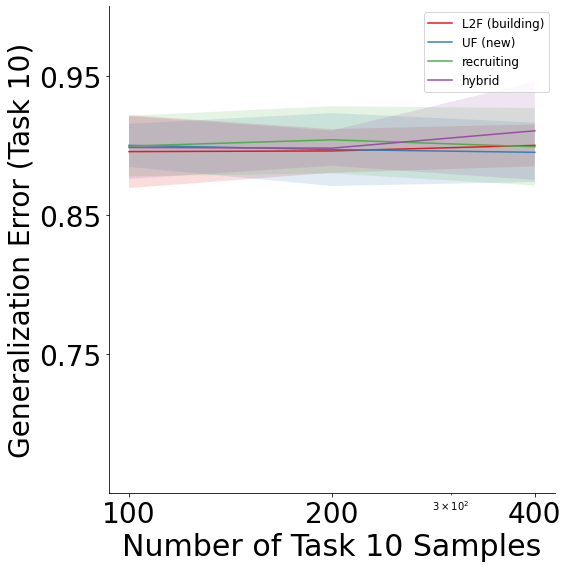

In [107]:
# plot results
recruitment_plot(mean_acc_dict, std_acc_dict, task_10_sample)

In [94]:
mean_acc_dict1 = mean_acc_dict
std_acc_dict1 = std_acc_dict

In [95]:
mean_acc_dict1

{'building': [0.8955, 0.8960000000000001, 0.9],
 'UF': [0.9, 0.8969999999999999, 0.8949999999999999],
 'recruiting': [0.8995, 0.9039999999999999, 0.899],
 'hybrid': [0.8985, 0.898, 0.9105000000000001]}